## Tests for Random Numbers
***ISE304 Systems Simulation (Dr. Nadi Serhan Aydin)***

Desirable properties of random numbers:
* Uniformity
* Independence

Tests to check these properties
* **Frequency test:** Kolmogorov–Smirnov or Chi-square test to compare the empirical distribution to theoretical uniform distribution

$$H_0:\quad R_i \sim \text{Uniform}[0,1]\\
H_1:\quad R_i \nsim \text{Uniform}[0,1]$$

* **Autocorrelation test:** compare the correlation between produced numbers to the desired correlation of $\rho=0$

$$H_0:\quad R_i \sim \text{Independently}\\
H_1:\quad R_i \nsim \text{Independently}$$

For each test, a **significance level** $\alpha$ must be specified. Remember from your Prob & Stat course that $\alpha$ is also called the Type I error, i.e., the probability of rejecting null hypothesis $H_0$ when it is true. Frequently $\alpha$ is set to $0.01$ or $0.05$. 

In [819]:
alpha = 0.05

For example, if the above test are applied to 100 sets of numbers that come out of a RNG, with an $\alpha$ of 0.05, we cannot reasonably discard the generator if the number of rejections is close to $100\alpha$.

### Kolmogorov–Smirnov Test (for frequency)
The KS test is based on the largest absolute deviation between the theoretical CDF of the uniform distribution $F(x)$ and empirical CDF of values generated $S_N(x)$, that is,

$$D=\max |F(x)-S_N(x)|$$

where $D$ has a known sampling distribution. If calculated $D$ is less than or equal to the critical value $D_\alpha$, then $H_0$ is not rejected.

Assume we generated five numbers $0.44,0.81,0.14,0.05,0.93$. To calculate $D$, we first sort them in an increasing order $0.14,0.05,0.44,0.81,0.93$ and find the maximum deviation from uniform CDF, which is $0.26$ in this case.

<img src="kstest.png" width="40%" alt="Site logo" align = "center" style="margin:0px 10px">

In [820]:
R = [0.44,0.81,0.14,0.05,0.93]
kstest(R,'uniform')

KstestResult(statistic=0.26, pvalue=0.81234688)

Let's run a single KS test on a sample of $N$ numbers drawn from a uniform distribution. 

In [826]:
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt

N = 100
np.random.seed(123)
R = np.random.rand(N)

kstest(R,'uniform')

KstestResult(statistic=0.11200459426796427, pvalue=0.1506858945503592)

Let's now run a KS test on $M=1000$ sets of values drawn from a uniform distribution (each sample again containing 𝑁 numbers).

In [837]:
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt

def kst():

    N = 100 #number of RNs
    #np.random.seed(123)
    R = np.random.rand(N)

    return kstest(R,'uniform').pvalue

M = 1000 #number of tests
pval = []
for j in range(M):
    pval.append(kst())

print('Pct of cases where H0 is retained: %.2f' % (sum(j>0.05 for j in pval)/M))
#plt.plot(pval,'-x')

Pct of cases where H0 is retained: 0.95


So, in general, the number of cases where $H_0$ is rejected is limited to $0.05$, which is our margin for Type-I error. The RNG seems to be reasonable.

Let's now apply the KS test on our numbers generated using multiplicative LCM in-class.

In [ ]:
# Colab users: first run this
from google.colab import files
files.upload()

In [921]:
R = pd.read_csv('lcm.csv')
#len(R)
kstest(R.RAND,'uniform')

KstestResult(statistic=0.07964317100000001, pvalue=0.7817859116113044)

In fact, Kolmogorov-Smirnov Test can be applied to many other distributions: `gamma`, `norm`, `lognorm`, `tirang`, `uniform`, ... just to name a few.

### Chi-square test (for frequency)

This test uses the sample statistic
$$\chi^2 = \sum_{i=1}^n\frac{(O_i-E_i)^2}{E_i}$$
where
* $O_i$: observed number in the $i$th class
* $E_i$: expected number in the $i$th class
* $n$: number of classes

$\chi^2$ has a chi-square distribution with $n-1$ degrees of freedom.

In [818]:
#import numpy as np
#import pandas as pd
#from scipy.stats import chisquare
#C = pd.read_csv('chisq.csv')

### Test for auto-correlation

The test is based on the autocorrelation between generated numbers. Let $\rho_{i,\ell}$ be the correlation between every $\ell$ numbers ($\ell$ is also known as *lag*) which is estimated from the sample using $\hat{\rho}_{i,\ell}$. 

$$H_0:\quad \rho_{i,\ell} = 0\\
H_1:\quad \rho_{i,\ell} \neq 0$$

For example, if we generate numbers $R_1,\dots,R_{50}$, then $\rho_{3,5}$ is the correlation between $R_3,R_8,R_{13},\dots,R_{48}$. 

The test statistic below is approximately standard normal and thus can be compared to standard normal table: 

$$z=\frac{\hat{\rho}_{i,\ell}}{\sigma_{\hat{\rho}_{i,\ell}}}$$

Instead of tests, we can rather use the graphs for auto-correlation and partial auto-correlation functions (ACF and PACF) to make a conclusion about whether auto-correlation (dependence) exists in our sequence, which means $H_0$ would be rejected.

For series with auto-correlation, we should observe

* An ACF graph that exhibits a geometric decay in auto-correlation

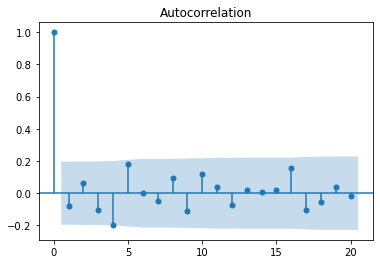

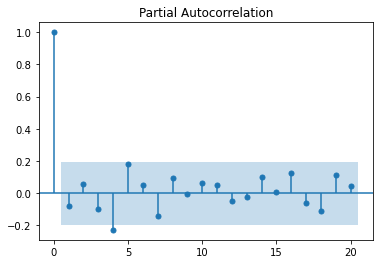

In [849]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
N = 100
R = np.random.rand(N)
plot_acf(R); 
plot_pacf(R);

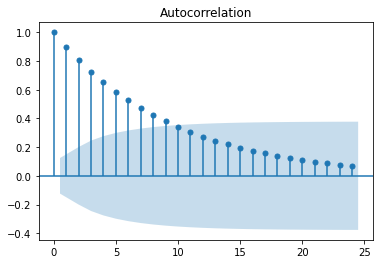

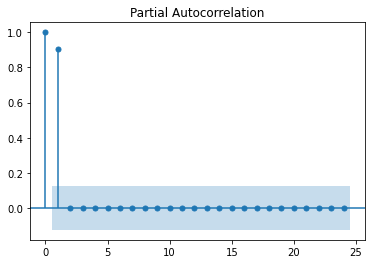

In [926]:
import numpy as np
import statsmodels.api as sm
alpha = np.array([.75, 0, 0, .5])
beta = np.array([0, 0])
ar = np.r_[1, -alpha] # add zero-lag and negate
ma = np.r_[1, beta] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 250)
plot_acf(y); 
plot_pacf(y);

### A quick note on Python `random` and `np.random` libraries 

If you set a seed, then everytime the same sequence of pseudo-random numbers will be generated (try increasing the sequence length).

In [314]:
R = []
random.seed(123)
for i in range(10):
    R.append(random.random())
print(R)

[0.052363598850944326, 0.08718667752263232, 0.4072417636703983, 0.10770023493843905, 0.9011988779516946, 0.0381536661023224, 0.5362020400339269, 0.33219769850967984, 0.8520866189293687, 0.1596623967219699]


Instead of specifying a seed, you can also get the current state `s` of the RNG for future reference.

In [162]:
s = random.getstate()

In [166]:
random.setstate(s)
for i in range(7):
    print(random.random())

0.3337963946289553
0.24516335251761112
0.0016705535792228554
0.4362757934152184
0.08761349975042287
0.5975994644879905
0.06987696145918243


A similar approach in `numpy`:

In [ ]:
import numpy as np
np.random.seed(1234)
#s = np.random.get_state()
#np.random.set_state(s)
np.random.rand(10)

## Random variate generation (Inverse transform)

### Exponential($\lambda$) where $X \geq 0$

Text(0.5, 1.0, 'Exponential(1/$\\lambda$)')

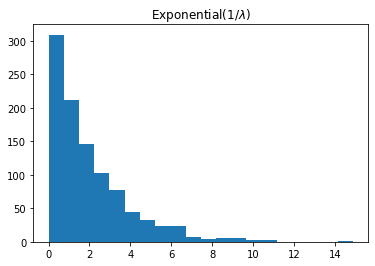

In [958]:
import numpy as np
np.random.seed(12345)
R = np.random.rand(1000)

lmbd = 0.5
X = (-1/lmbd)*np.log(1-R)

#plt.hist(R,20); plt.title('Uniform(0,1)')
plt.hist(X,20); plt.title('Exponential(1/$\lambda$)')

### Uniform($a,b$) where $X\in[a,b]$

Text(0.5, 1.0, 'Uniform(a,b)')

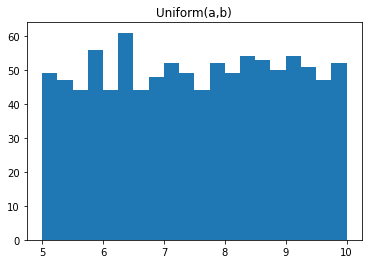

In [933]:
import numpy as np
np.random.seed(12345)
R = np.random.rand(1000)

a,b = 5,10
X = a + (b-a)*R

#plt.hist(R,20); plt.title('Uniform(0,1)')
plt.hist(X,20); plt.title('Uniform(a,b)')

### Weibull($\alpha,\beta$) where $X\geq 0$

Text(0.5, 1.0, 'Weibull (alpha,beta)')

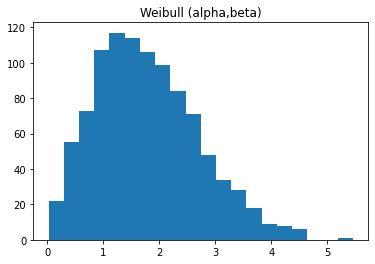

In [932]:
import numpy as np
np.random.seed(12345)
R = np.random.rand(1000)

alpha,beta = 0.5,2
X = (1/alpha)*(-np.log(1-R))**(1/beta)

#plt.hist(R,20); plt.title('Uniform(0,1)')
plt.hist(X,20); plt.title('Weibull (alpha,beta)')

### Triangular(0,2) where $X\in [0,2]$

Text(0.5, 1.0, 'Triangular(0,2)')

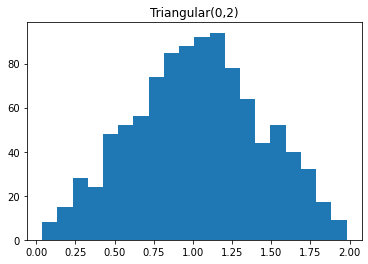

In [974]:
import numpy as np
np.random.seed(12345)
R = np.random.rand(1000)

R1 = R[R<=1/2]
R2 = R[R>1/2]

X1 = np.sqrt(2*R1)
X2 = 2-np.sqrt(2*(1-R2))

X = np.concatenate((X1,X2))

#plt.hist(R,20); plt.title('Uniform(0,1)')
plt.hist(X,20); plt.title('Triangular(0,2)')